<h1><center>Data Scientist Challenge - LATAM Airlines</center></h1>
<h2><center>María Ignacia Loyola Fraile</center></h2>

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly

In [2]:
def listas_por_pantalla(lista):
    n = len(lista)
    for indice in range(n):
        print(lista[indice])
    print(' ')
    print('Total: ' + str(n))

In [3]:
def temporada_alta(data, fecha):
    
    
    lista = []
    indice_fecha = data.columns.get_loc(fecha)
    
    for indice in range(data.shape[0]):
        if ((data.iloc[indice, indice_fecha].month == 1) | (data.iloc[indice, indice_fecha].month == 2)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 12) & (data.iloc[indice, indice_fecha].day >= 15)):
            lista.append(1)
        elif ((data.iloc[indice, indice_fecha].month == 3) & (data.iloc[indice, indice_fecha].day <= 3)):
            lista.append(1)
            
        elif ((data.iloc[indice, indice_fecha].month == 7) & (data.iloc[indice, indice_fecha].day >= 15 )):
            lista.append(1)
        
        elif ((data.iloc[indice, indice_fecha].month == 9) & (data.iloc[indice, indice_fecha].day >= 11)):
            lista.append(1)
        
        else:
            lista.append(0)
    return lista

In [4]:
def periodo_dia(data, col):
    
    periodos = []
    indice_col = data.columns.get_loc(col)
    
    for indice in range(data.shape[0]):
        
        if ((data.iloc[indice, indice_col].hour >= 5) & (data.iloc[indice, indice_col].hour < 12)):
            periodos.append('mañana')
        
        elif ((data.iloc[indice, indice_col].hour >= 12) & (data.iloc[indice, indice_col].hour < 19)):
            periodos.append('tarde')
        else:
            periodos.append('noche')
    return periodos
        
        

In [5]:
def dif_min(data, dife_hrs, dife_min):
    
    indice_hrs = data.columns.get_loc(dife_hrs)
    indice_min = data.columns.get_loc(dife_min)
    minutos = []
    retrasos = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_hrs] < 0):
            minutos.append((60-data.iloc[indice, indice_min])*(-1))
            retrasos.append('No')
            
        elif(data.iloc[indice, indice_hrs] == 0):
            minutos.append(data.iloc[indice, indice_min])
            retrasos.append('Sí')
            
        else:
            minutos.append(((data.iloc[indice, indice_hrs])*60) + data.iloc[indice, indice_min])
            retrasos.append('Sí')
    data['dif_min'] = minutos
    #data['Retraso(SI/NO)'] = retrasos
    
    
    

In [6]:
def minutos_totales(data, fecha_I, fecha_O):
    
    data['TimeDelta'] = data[fecha_O] - data[fecha_I]
    minutos = []
    horas = []
    for indice in range(data.shape[0]):
        horas.append(data.iloc[indice,-1].total_seconds()//3600)
        minutos.append((data.iloc[indice,-1].total_seconds()%3600)//60)
        
    data['dif_hrs'] = horas
    data['dif_minn'] = minutos
    
    dif_min(data, 'dif_hrs','dif_minn')
    
    
    
    

In [7]:
def atraso_15(data, dif_min):
    
    indice_dif_min = data.columns.get_loc(dif_min)
    retraso_15 = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_dif_min] > 15):
            retraso_15.append(1)
            
        else:
            retraso_15.append(0)
            
    return retraso_15

In [8]:
def dif_I_O(data, col, cols):
    
    indice_col = data.columns.get_loc(col)
    indice_cols = data.columns.get_loc(cols)
    cont = 0
    aux = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] != data.iloc[indice, indice_cols]):
            cont += 1
            aux.append('Sí')
        else:
            aux.append('No')
            
    if(cont != 0):
        data[col + '/' + cols] = aux
        
    else:
        return None

In [57]:
#retornando dataset por meses
def Meses(data, col):
    
    enero = data[data[col] == 1]
    febrero = data[data[col] == 2]
    marzo = data[data[col] == 3]
    abril = data[data[col] == 4]
    mayo = data[data[col] == 5]
    junio = data[data[col] == 6]
    julio = data[data[col] == 7]
    agosto = data[data[col] == 8]
    septiembre = data[data[col] == 9]
    octubre = data[data[col] == 10]
    noviembre = data[data[col] == 11]
    diciembre = data[data[col] == 12]
    
    return enero, febrero, marzo, abril, mayo, junio, julio, agosto, septiembre, octubre, noviembre, diciembre
    
            
            
            
            
    
    
    

In [10]:
def Frecuencias(data, col):
    
    acumulado = 0
    frecuencia = []
    indice_col = data.columns.get_loc(col)
    
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] > 0):
            acumulado += 1
            frecuencia.append(acumulado)
        else:
            frecuencia.append(0)
    return frecuencia
            

In [44]:
def cols_extras(data, col, col2, col3, col4):
    
    col = data[col].tolist()
    col2 = data[col2].tolist()
    col3 = data[col3].tolist()
    col4 = data[col4].tolist()
    return col, col2, col3, col4
        
        
    
    

In [74]:
def proporcion(data, col):
    
    indice_col = data.columns.get_loc(col)
    frec = 0
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] > 0):
            frec+=1
        
    return (frec/data.shape[0])

In [47]:
def dia_semana(data, col):
    
    indice_col = data.columns.get_loc(col)
    dias = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] == 'Monday'):
            dias.append('Lunes')
        elif(data.iloc[indice, indice_col] == 'Tuesday'):
            dias.append('Martes')
            
        elif(data.iloc[indice, indice_col] == 'Wednesday'):
            dias.append('Miércoles')
            
        elif(data.iloc[indice, indice_col] == 'Thursday'):
            dias.append('Jueves')
            
        elif(data.iloc[indice, indice_col] == 'Friday'):
            dias.append('Viernes')
            
        elif(data.iloc[indice, indice_col] == 'Saturday'):
            dias.append('Sábado')
            
        else:
            dias.append('Domingo')
    return dias
        
        

In [131]:
# Carga del dataset
#data_index = pd.read_csv('C:/Users/Ignacia/Desktop/Ignacia/Postulaciones/LATAM/dataset_SCL.csv',index_col=0, parse_dates=True)
data = pd.read_csv('C:/Users/Ignacia/Desktop/Ignacia/Postulaciones/LATAM/dataset_SCL.csv')

In [132]:

data['Fecha-I'] = pd.to_datetime(data['Fecha-I']) 
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])
data = data.sort_values(by = 'Fecha-I')
data['Año_I'] = data['Fecha-I'].dt.year                                
data['Mes_I'] = data['Fecha-I'].dt.month                               
data['Dia_IName'] = data['Fecha-I'].dt.day_name()  
data['Hora_IName'] = data['Fecha-I'].dt.time  
data['temporada_alta'] = temporada_alta(data, 'Fecha-I')
data['periodo_dia'] = periodo_dia(data,'Fecha-I')
minutos_totales(data,'Fecha-I','Fecha-O')
data = data.drop(['TimeDelta','dif_hrs', 'dif_minn'],axis = 1)
data['atraso_15'] = atraso_15(data, 'dif_min')

In [134]:
print(data['Año_I'].unique())

[2017]


In [137]:
enero, febrero, marzo, abril, mayo, junio, julio, agosto, septiembre, octubre, noviembre, diciembre = Meses(data, 'Mes_I')

In [138]:
enero_prom = proporcion(enero, 'dif_min')
febrero_prom = proporcion(febrero, 'dif_min')
marzo_prom = proporcion(marzo, 'dif_min')
abril_prom = proporcion(abril, 'dif_min')
mayo_prom = proporcion(mayo, 'dif_min')
junio_prom = proporcion(junio, 'dif_min')
julio_prom = proporcion(julio, 'dif_min')
agosto_prom = proporcion(agosto, 'dif_min')
septiembre_prom = proporcion(septiembre, 'dif_min')
octubre_prom = proporcion(octubre, 'dif_min')
noviembre_prom = proporcion(noviembre, 'dif_min')
diciembre_prom = proporcion(diciembre, 'dif_min')

aux = pd.DataFrame({
    
    'MES': ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO',
           'SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'],
    'TASA': [enero_prom, febrero_prom, marzo_prom, abril_prom,
             mayo_prom, junio_prom,julio_prom, agosto_prom, septiembre_prom,
            octubre_prom, noviembre_prom, diciembre_prom]

})

In [119]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'periodo_dia',
       'dif_min', 'atraso_15', 'Frecuencia', 'Año_I', 'Mes_I', 'Dia_IName',
       'Hora_IName'],
      dtype='object')

In [146]:
def frecuencia_atraso(data, col, destino, dif_min):
    
    indice_col = data.columns.get_loc(col)
    indice_dif_min = data.columns.get_loc(dif_min)
    cont = 0
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] == destino) & (data.iloc[indice, indice_dif_min] > 0):
            
            cont+=1
            
    return cont
            
            

In [148]:
def tasa_ocurrencia(data, col, destino, dif_min):
    
    indice_col = data.columns.get_loc(col)
    indice_dif_min = data.columns.get_loc(dif_min)
    
    cont = 0
    
    for indice in range(data.shape[0]):
        if(data.iloc[indice, indice_col] == destino):
            cont+=1
    aux = frecuencia_atraso(data, col, destino, dif_min)
    return aux/cont

# Sección 3: 



### Tasas de Ocurrencias

$ Tasa \ de \ ocurrencia = \frac{Número\ de \ Ocurrencias}{Casos\ Totales}$

In [178]:
destinos = data['SIGLADES'].unique().tolist()
valores = []
atrasos = []

for indice in range(len(destinos)):
    
    valores.append(tasa_ocurrencia(data,'SIGLADES',destinos[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'SIGLADES',destinos[indice],'dif_min'))


In [179]:
def cantidad(data, col, variable):
    
    indice_col = data.columns.get_loc(col)
    cont = 0
    
    for indice in range(data.shape[0]):
        if(data.iloc[indice, indice_col] == variable):
            cont+=1
            
    return cont

In [180]:
cantidad_total = []
for indice in range(len(destinos)):
    cantidad_total.append(cantidad(data,'SIGLADES',destinos[indice]))
    
    

# Por destino

In [181]:
tasas_2017 = pd.DataFrame({
    'Destino':destinos,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
})

In [184]:
#Dibujamos la tabla 
tasas_2017

,Destino,N Vuelos,N Vuelos atrasados,Tasa
0,Ciudad de Mexico,700,316,0.451429
1,Bogota,1604,1046,0.652120
2,Ciudad de Panama,1850,685,0.370270
3,Rio de Janeiro,1435,1118,0.779094
4,Lima,5270,3688,0.699810
...,...,...,...,...
57,"Pisco, Peru",1,1,1.000000
58,Puerto Stanley,1,1,1.000000
59,Ushuia,6,6,1.000000
60,Cochabamba,1,1,1.000000


DE CADA 700 VUELOS CON DESTINO A MEXICO, 316 PUEDEN SER ATRASADOS

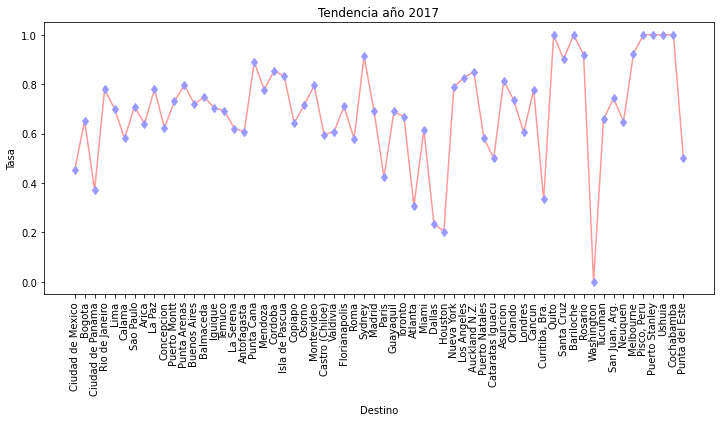

In [219]:
plt.figure(figsize=(12,5))
plt.plot(tasas_2017['Destino'],tasas_2017['Tasa'],marker='d',linestyle='-', c = '#ff9999',markeredgecolor='#9999ff',markerfacecolor='#9999ff')
plt.xticks(rotation = 90)
plt.xlabel('Destino', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

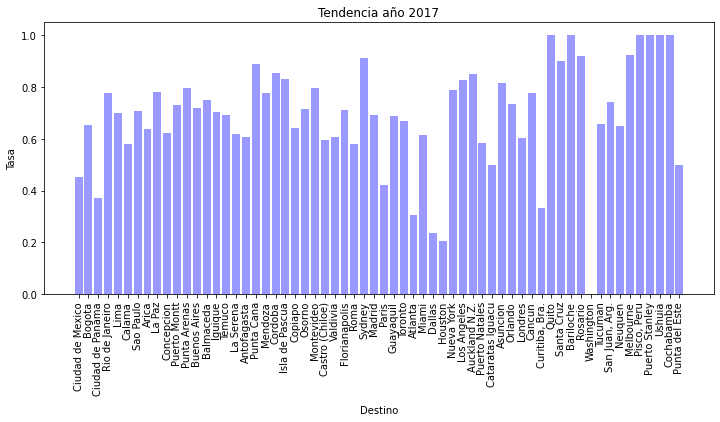

In [183]:
plt.figure(figsize=(12,5))
plt.bar(tasas_2017['Destino'],tasas_2017['Tasa'], color = '#9999ff')
plt.xticks(rotation = 90)
plt.xlabel('Destino', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

In [193]:
# Agregar conclusion


# Por aerolínea

In [198]:
aerolineas = data['OPERA'].unique().tolist()

valores = []
atrasos = []
cantidad_total = []

for indice in range(len(aerolineas)):
    valores.append(tasa_ocurrencia(data,'OPERA',aerolineas[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'OPERA',aerolineas[indice],'dif_min'))
    cantidad_total.append(cantidad(data,'OPERA',aerolineas[indice]))
    

In [206]:

tasa_aerolineas = pd.DataFrame({
    'aerolineas':aerolineas,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
    
})

In [207]:
tasa_aerolineas.head(5)

,aerolineas,N Vuelos,N Vuelos atrasados,Tasa
0,Aeromexico,351,78,0.222222
1,Grupo LATAM,40892,30132,0.736868
2,Copa Air,1850,685,0.370270
3,Avianca,1152,660,0.572917
4,Gol Trans,806,471,0.584367


In [215]:
#Agregar conslusion

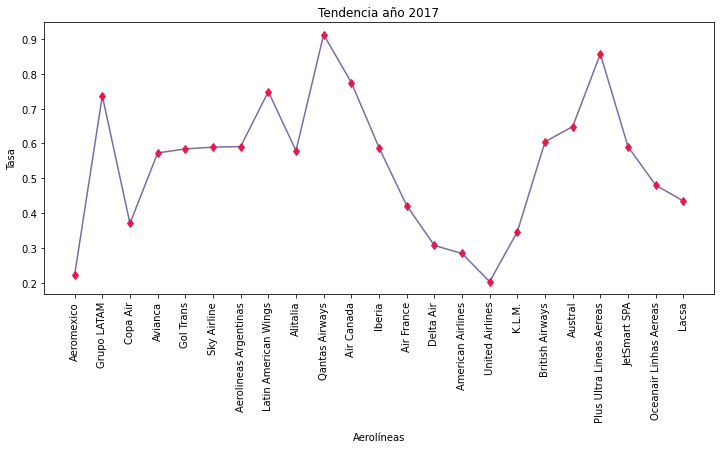

In [213]:
plt.figure(figsize=(12,5))
plt.plot(tasa_aerolineas['aerolineas'],tasa_aerolineas['Tasa'],marker='d',linestyle='-', c = '#7f69a5',markeredgecolor='#e51a4c',markerfacecolor='#e51a4c')
plt.xticks(rotation = 90)
plt.xlabel('Aerolíneas', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

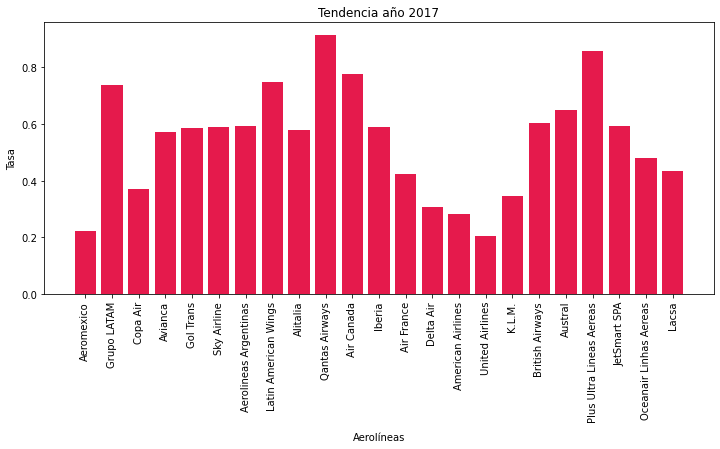

In [214]:
plt.figure(figsize=(12,5))
plt.bar(tasa_aerolineas['aerolineas'],tasa_aerolineas['Tasa'], color = '#e51a4c')
plt.xticks(rotation = 90)
plt.xlabel('Aerolíneas', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

In [220]:
#agregar conclusion

### Tasa por mes del año

In [222]:
def cambio_de_meses(data, col):
    
    indice_col = data.columns.get_loc(col)
    mes = []
    for indice in range(data.shape[0]):
        
        if(data.iloc[indice, indice_col] == 1):
            mes.append('Enero')
        elif(data.iloc[indice, indice_col] == 2):
            mes.append('Febrero')
            
        elif(data.iloc[indice, indice_col] == 3):
            mes.append('Marzo')
            
        elif(data.iloc[indice, indice_col] == 4):
            mes.append('Abril')
            
        elif(data.iloc[indice, indice_col] == 5):
            mes.append('Mayo')
            
        elif(data.iloc[indice, indice_col] == 6):
            mes.append('Junio')
            
        elif(data.iloc[indice, indice_col] == 7):
            mes.append('Julio')
            
        elif(data.iloc[indice, indice_col] == 8):
            mes.append('Agosto')
            
        elif(data.iloc[indice, indice_col] == 9):
            mes.append('Septiembre')
            
        elif(data.iloc[indice, indice_col] == 10):
            mes.append('Octubre')
            
        elif(data.iloc[indice, indice_col] == 11):
            mes.append('Noviembre')
            
        else:
            mes.append('Diciembre')
    return mes

In [224]:
data['MES_I'] = cambio_de_meses(data,'Mes_I' )

In [226]:
data = data.drop(['Mes_I'],axis = 1)

In [228]:
meses_tasa = data['MES_I'].unique().tolist()

valores = []
atrasos = []
cantidad_total = []

for indice in range(len(meses_tasa)):
    valores.append(tasa_ocurrencia(data,'MES_I',meses_tasa[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'MES_I',meses_tasa[indice],'dif_min'))
    cantidad_total.append(cantidad(data,'MES_I',meses_tasa[indice]))

In [229]:
tasa_por_mes = pd.DataFrame({
    'Mes':meses_tasa,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
    
})

In [233]:
tasa_por_mes

,Mes,N Vuelos,N Vuelos atrasados,Tasa
0,Enero,6108,4042,0.661755
1,Febrero,5561,3628,0.652401
2,Marzo,5480,3099,0.565511
3,Abril,5021,2975,0.592511
4,Mayo,5239,3359,0.641153
5,Junio,4982,3231,0.648535
6,Julio,5991,4613,0.769988
7,Agosto,5744,3717,0.647110
8,Septiembre,5610,3621,0.645455
9,Octubre,6032,4300,0.712865


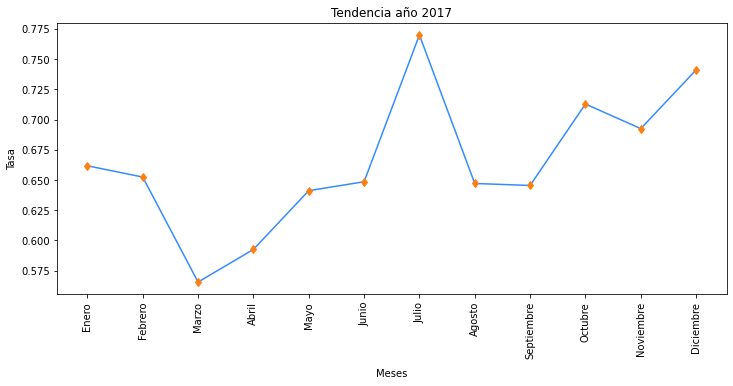

In [237]:
plt.figure(figsize=(12,5))
plt.plot(tasa_por_mes['Mes'],tasa_por_mes['Tasa'],marker='d',linestyle='-', c = '#338bff',markeredgecolor='#ff7f0e',markerfacecolor='#ff7f0e')
plt.xticks(rotation = 90)
plt.xlabel('Meses', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

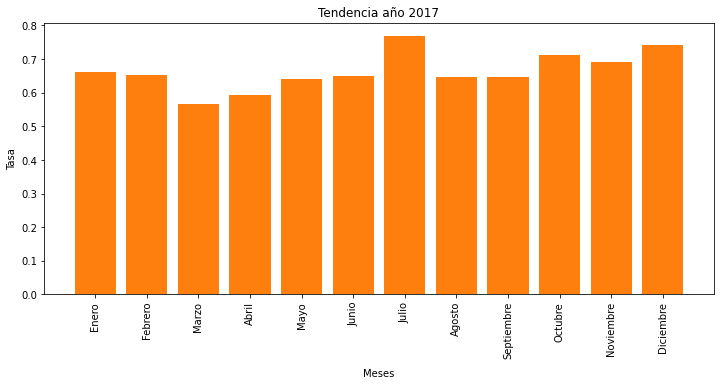

In [234]:
plt.figure(figsize=(12,5))
plt.bar(tasa_por_mes['Mes'],tasa_por_mes['Tasa'], color = '#ff7f0e')
plt.xticks(rotation = 90)
plt.xlabel('Meses', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

In [238]:
#agregar conclusion

In [240]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Año_I', 'Dia_IName', 'Hora_IName',
       'temporada_alta', 'periodo_dia', 'dif_min', 'atraso_15', 'MES_I'],
      dtype='object')

### Tasa por tipo de vuelo (Internacional / Nacional)

In [241]:
vuelos = data['TIPOVUELO'].unique().tolist()

valores = []
atrasos = []
cantidad_total = []

for indice in range(len(vuelos)):
    valores.append(tasa_ocurrencia(data,'TIPOVUELO',vuelos[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'TIPOVUELO',vuelos[indice],'dif_min'))
    cantidad_total.append(cantidad(data,'TIPOVUELO',vuelos[indice]))

In [242]:

tasa_tipovuelo = pd.DataFrame({
    'TIPOVUELO':vuelos,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
    
})

In [243]:
tasa_tipovuelo

,TIPOVUELO,N Vuelos,N Vuelos atrasados,Tasa
0,I,31240,21197,0.678521
1,N,36966,24310,0.657631


### Tasa de ocurrencia por día de la semana

In [245]:
data.head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Año_I,Dia_IName,Hora_IName,temporada_alta,periodo_dia,dif_min,atraso_15,MES_I
169,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,Santiago,Ciudad de Mexico,2017,Sunday,00:15:00,1,noche,-11.0,0,Enero
5078,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,Santiago,Bogota,2017,Sunday,01:15:00,1,noche,-5.0,0,Enero


In [246]:
dia_semana = data['Dia_IName'].unique().tolist()

valores = []
atrasos = []
cantidad_total = []

for indice in range(len(dia_semana)):
    valores.append(tasa_ocurrencia(data,'Dia_IName',dia_semana[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'Dia_IName',dia_semana[indice],'dif_min'))
    cantidad_total.append(cantidad(data,'Dia_IName',dia_semana[indice]))

In [247]:
tasa_diasemana = pd.DataFrame({
    'Dia de la semana':dia_semana,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
    
})

In [248]:
tasa_diasemana

,Dia de la semana,N Vuelos,N Vuelos atrasados,Tasa
0,Sunday,9833,6299,0.640598
1,Monday,10098,6808,0.674193
2,Tuesday,9666,6210,0.642458
3,Wednesday,9726,6419,0.659984
4,Thursday,10245,7001,0.683358
5,Friday,10332,7421,0.718254
6,Saturday,8306,5349,0.643992


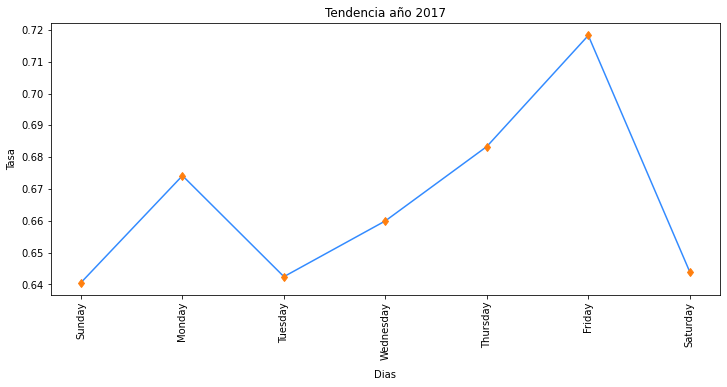

In [249]:
plt.figure(figsize=(12,5))
plt.plot(tasa_diasemana['Dia de la semana'],tasa_diasemana['Tasa'],marker='d',linestyle='-', c = '#338bff',markeredgecolor='#ff7f0e',markerfacecolor='#ff7f0e')
plt.xticks(rotation = 90)
plt.xlabel('Dias', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

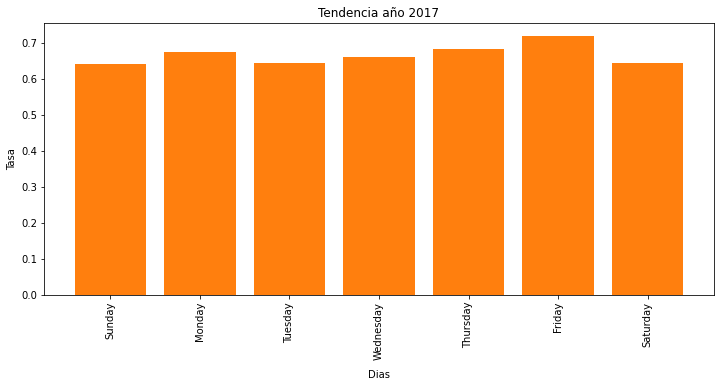

In [250]:
plt.figure(figsize=(12,5))
plt.bar(tasa_diasemana['Dia de la semana'],tasa_diasemana['Tasa'], color = '#ff7f0e')
plt.xticks(rotation = 90)
plt.xlabel('Dias', labelpad=10)
plt.ylabel('Tasa')
plt.title('Tendencia año 2017')
plt.show()

In [254]:
temporada = data['temporada_alta'].unique().tolist()

valores = []
atrasos = []
cantidad_total = []

for indice in range(len(temporada)):
    valores.append(tasa_ocurrencia(data,'temporada_alta',temporada[indice],'dif_min'))
    atrasos.append(frecuencia_atraso(data, 'temporada_alta',temporada[indice],'dif_min'))
    cantidad_total.append(cantidad(data,'temporada_alta',temporada[indice]))

In [255]:
tasa_temporada = pd.DataFrame({
    'Temporada':temporada,
    'N Vuelos':cantidad_total,
    'N Vuelos atrasados':atrasos,
    'Tasa':valores
    
})

In [258]:
tasa_temporada

,Temporada,N Vuelos,N Vuelos atrasados,Tasa
0,1,22762,15558,0.683508
1,0,45444,29949,0.659031


$Esta \times Ecuación = \frac{Es}{En \cdot la \cdot misma \cdot línea}$

In [31]:
# Exportamos un archivo csv con las columnas generadas anteriormente, en una ruta por default
data.to_csv('synthetic_features.csv')

# Distribucion

In [262]:
from funpymodeling.exploratory import freq_tbl

In [265]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Año_I', 'Dia_IName', 'Hora_IName',
       'temporada_alta', 'periodo_dia', 'dif_min', 'atraso_15', 'MES_I'],
      dtype='object')

In [272]:
vuelos = freq_tbl(data['MES_I'])

,MES_I,frequency,percentage,cumulative_perc
0,Diciembre,6357,0.093203,0.093203
1,Enero,6108,0.089552,0.182755
2,Noviembre,6081,0.089156,0.271912
3,Octubre,6032,0.088438,0.360350
4,Julio,5991,0.087837,0.448186
5,Agosto,5744,0.084215,0.532402
6,Septiembre,5610,0.082251,0.614653
7,Febrero,5561,0.081532,0.696185
8,Marzo,5480,0.080345,0.776530
9,Mayo,5239,0.076811,0.853341
